In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [17]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(562, 1000, 3)


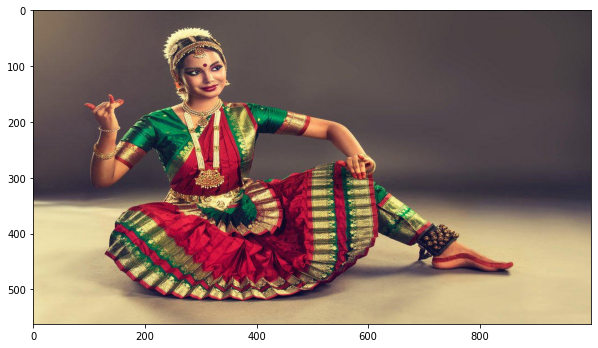

In [124]:
input_img=cv2.imread('/content/gdrive/My Drive/dataset/test/112.jpg',1)
input_img=cv2.cvtColor(input_img,cv2.COLOR_BGR2RGB)
print(input_img.shape)
plt.figure(figsize=(10,20))
plt.imshow(input_img)

In [129]:
def paper_noise(shape,paper=False,salt=False):

  img=np.zeros(shape)
  if paper:                                      # adding the paper noise
    if len(shape)>2:
      for i in range(shape[0]):
        for j in range(shape[1]):
            for l in range(shape[2]):
              if np.random.rand()>.92:
                img[i][j][l]=np.random.randint(0,255)
    else:
      for i in range(shape[0]):
        for j in range(shape[1]):
          if np.random.rand()>.92:
            img[i][j]=np.random.randint(0,255)
    print('paper')

  if salt:                                        # adding the salt noise
    if len(shape)>2:
      for i in range(shape[0]):
        for j in range(shape[1]):
          if np.random.rand()>.92:
            tmp=np.random.randint(0,255)
            img[i][j]=np.array([tmp,tmp,tmp])
    else:
      for i in range(shape[0]):
        for j in range(shape[1]):
          if np.random.rand()>.92:
            img[i][j]=np.random.randint(0,255)
    print('salt')
  return img

paper


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


salt


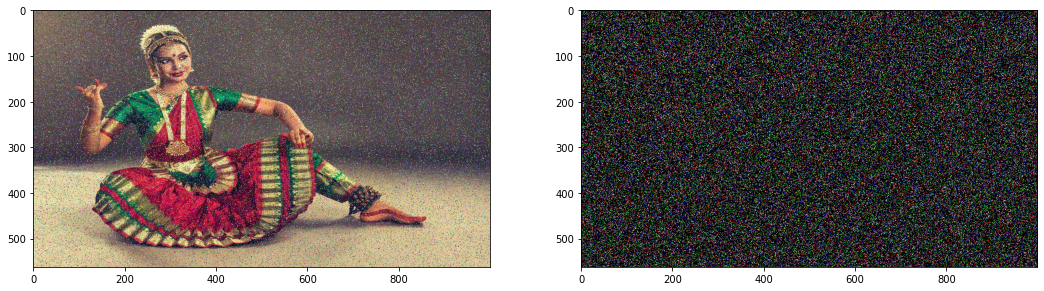

In [185]:
shape=input_img.shape
img=paper_noise(shape,paper=True,salt=True)
image=input_img.copy()
image[img>0]=img[img>0]
plt.figure(figsize=(18,30))
plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(img)

In [182]:
def grain(shape):
  img=np.ones(shape)*30
  if len(shape)>2:
    for i in range(1,shape[0]):
      for j in range(1,shape[1]):
        if np.random.rand()>.7:
          tmp=np.mean(img[i][j-1])+np.mean(img[i-1][j])+np.mean(img[i-1][j-1])
          if tmp>20:
            img[i][j]=np.array([80,80,80])+np.random.randint(-tmp,tmp)
  
  else:
    for i in range(shape[0]):
      for j in range(shape[1]):
        if np.random.rand()>.83:
          tmp=img[i-1][j-1]+img[i][j-1]+img[i-1][j]
          if tmp>75:
            img[i][j]=80+np.random.randint(-tmp/10,tmp/10)

  return img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


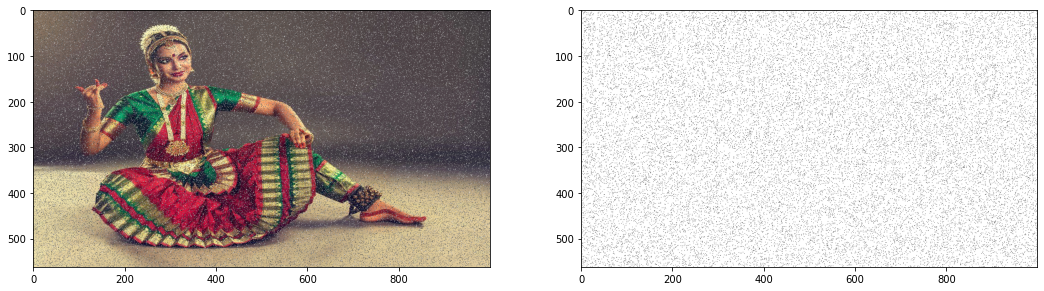

In [184]:
shape=input_img.shape
img=grain(shape)
image=input_img.copy()
image[img>60]=img[img>60]
plt.figure(figsize=(18,30))
plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(img)